# 🔍 Segmentación de Clientes con Clustering Jerárquico, K-Means y DBSCAN

En este notebook analizamos un conjunto de datos de clientes de una tienda retail. Aplicaremos tres algoritmos de *clustering* para identificar patrones y segmentos ocultos:

1. **Clustering Jerárquico:** Visualiza relaciones entre datos mediante un dendrograma.
2. **K-Means:** Divide los datos en *k* grupos según distancias internas.
3. **DBSCAN:** Agrupa según densidad y detecta anomalías automáticamente.

Este análisis es útil para diseñar campañas de marketing personalizadas y detectar perfiles atípicos de clientes.


In [1]:
# 📦 Librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# 🎲 Generar el dataset
np.random.seed(42)
n_samples = 1000
data = {
    "Edad": np.random.randint(18, 65, size=n_samples),
    "Ingreso_Mensual": np.abs(np.random.normal(2500, 800, size=n_samples)).astype(int),
    "Frecuencia_Compra": np.random.poisson(4, size=n_samples),
    "Gasto_Promedio": np.abs(np.random.normal(80, 20, size=n_samples)).round(2)
}
df = pd.DataFrame(data)
df.head()


,Edad,Ingreso_Mensual,Frecuencia_Compra,Gasto_Promedio
0,56,3305,3,53.00
1,46,2038,5,115.36
2,32,3168,5,86.40
3,60,1596,1,51.86
4,25,2923,3,71.16


In [2]:
# 🔄 Normalización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)


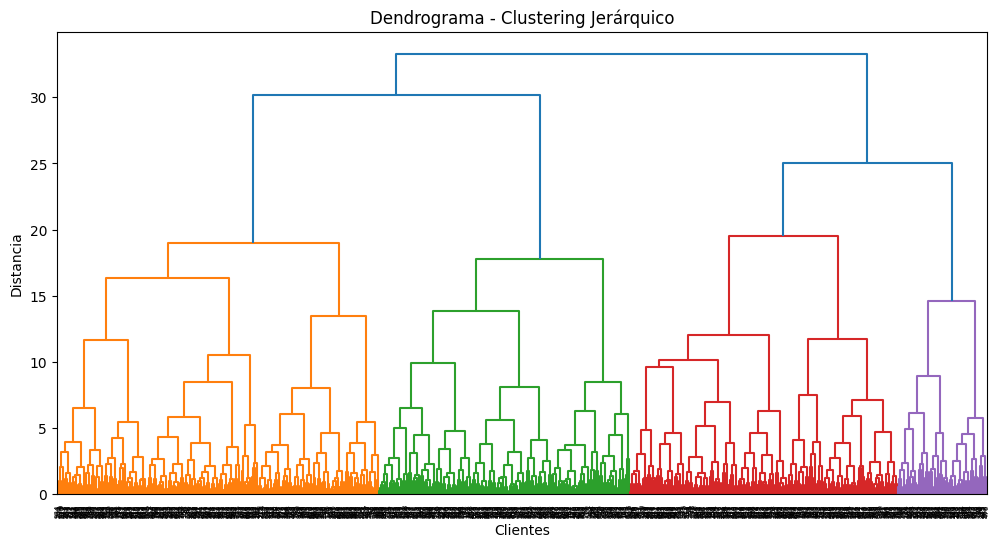

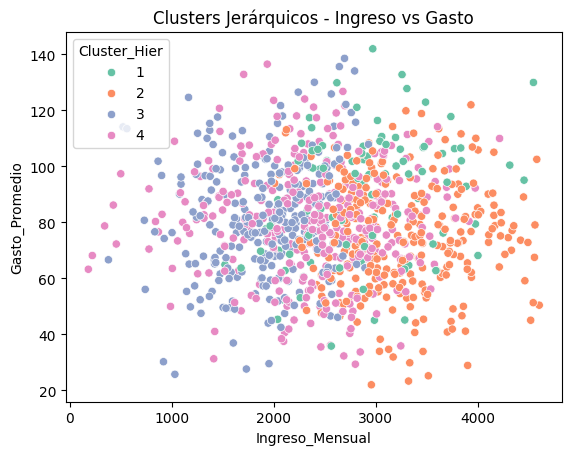

In [3]:
# 🌳 Clustering Jerárquico
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title("Dendrograma - Clustering Jerárquico")
plt.xlabel("Clientes")
plt.ylabel("Distancia")
plt.show()

# ✂️ Asignación de clústeres jerárquicos
df["Cluster_Hier"] = fcluster(linked, 4, criterion='maxclust')

# 📈 Visualización
sns.scatterplot(data=df, x="Ingreso_Mensual", y="Gasto_Promedio", hue="Cluster_Hier", palette="Set2")
plt.title("Clusters Jerárquicos - Ingreso vs Gasto")
plt.show()


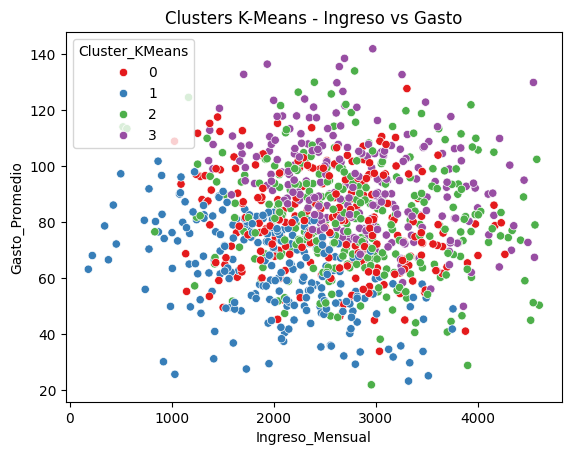

In [4]:
# 📌 K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
df["Cluster_KMeans"] = kmeans.fit_predict(X_scaled)

# 📉 Visualización
sns.scatterplot(data=df, x="Ingreso_Mensual", y="Gasto_Promedio", hue="Cluster_KMeans", palette="Set1")
plt.title("Clusters K-Means - Ingreso vs Gasto")
plt.show()


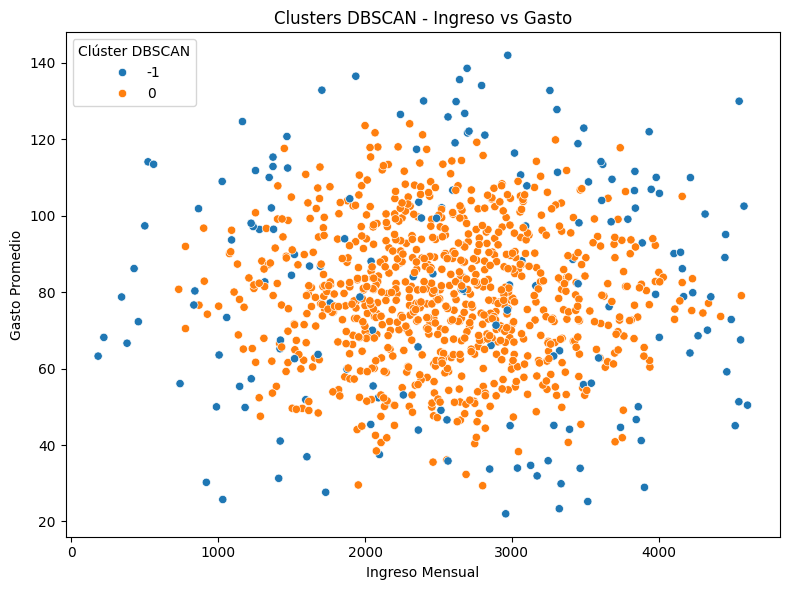

In [5]:
# 🌐 DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=8)
df["Cluster_DBSCAN"] = dbscan.fit_predict(X_scaled)

# 📊 Visualización DBSCAN
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Ingreso_Mensual", y="Gasto_Promedio", hue="Cluster_DBSCAN", palette="tab10")
plt.title("Clusters DBSCAN - Ingreso vs Gasto")
plt.xlabel("Ingreso Mensual")
plt.ylabel("Gasto Promedio")
plt.legend(title="Clúster DBSCAN")
plt.tight_layout()
plt.show()
